# Correction of practice 11

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sksel
import sklearn.preprocessing as skprepro
import sklearn.linear_model as skmod
import sklearn.preprocessing as skprepro

In [5]:
df = pd.read_parquet(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_11\Data_to_analyse.parquet")
print(df)

     Account_money  Age  Money_given
0         59781878   81   569.984834
1         72742895   39   812.686814
2         22068382   34   758.240188
3         42234777   69   694.674949
4         74637447   21   965.911727
..             ...  ...          ...
995       85403167   44   808.895932
996       16766354   20   816.391936
997       96516749   45   949.277095
998       40368947   80   635.242943
999       33795363   74   624.205544

[1000 rows x 3 columns]


In [9]:
arr_x1 = df['Account_money'].to_numpy().reshape(-1,1)
arr_x2 = df.Age.to_numpy().reshape(-1,1)
label = df.Money_given.to_numpy().reshape(-1,1)

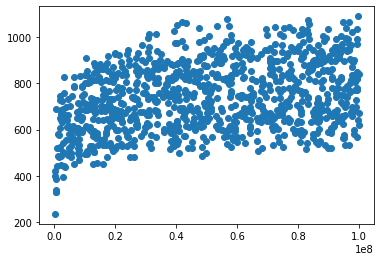

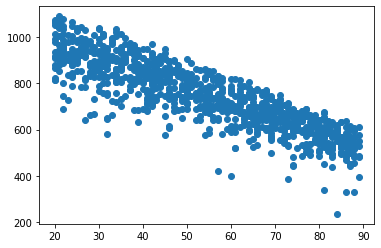

In [15]:
plt.scatter(arr_x1, label)
plt.show()
plt.scatter(arr_x2, label)
plt.show()
# plt.scatter(arr_x1, arr_x2)

In [19]:
x = np.hstack([arr_x1, arr_x2])
x_train, x_test, y_train, y_test = sksel.train_test_split(x, 
                                                          label, 
                                                          shuffle = True,
                                                         train_size = 0.8)
print(len(x_train))
# x_train, x_test, y_train, y_test = sksel.train_test_split(df.loc[:, ['Account_money', 'Age']], 
#                                                           df.money_given, 
#                                                           shuffle = True,
#                                                          train_size = 0.8)

800


In [23]:
scaler_x  = skprepro.StandardScaler()
scaler_x = scaler_x.fit(x_train)
x_train_standard = scaler_x.transform(x_train)

scaler_y  = skprepro.StandardScaler()
scaler_y = scaler_y.fit(y_train)
y_train_standard = scaler_y.transform(y_train)

In [26]:
model = skmod.LinearRegression()
model = model.fit(x_train_standard, y_train_standard)
print(model.coef_)
print(model.intercept_)
#equ : y' = 0.37*x1 - 0.86*x2 + 0


[[ 0.36550105 -0.85964012]]
[3.39080908e-16]


In [28]:
print(model.score(x_train_standard, y_train_standard))
x_test_standard = scaler_x.transform(x_test)
y_test_standard = scaler_y.transform(y_test)
print(model.score(x_test_standard, y_test_standard))

0.8712874604611717
0.8770920531765084


In [35]:
# o	John: Money on his account: 100 000$, age: 20
# o	Charles: Money on his account: 100 000 000$, age: 90
x_predict = np.array([[100_000, 20], [100_000_000, 90]])
print(x_predict)
x_predict_standard = scaler_x.transform(x_predict)
print(x_predict_standard)
y_predict_standard = model.predict(x_predict_standard)
print(y_predict_standard)
y_predict = scaler_y.inverse_transform(y_predict_standard)
print(y_predict)

[[   100000        20]
 [100000000        90]]
[[-1.66375871 -1.73326413]
 [ 1.65738641  1.74357046]]
[[ 0.88187783]
 [-0.89306665]]
[[867.55910309]
 [605.77042307]]


# Lecture 12: Logistic regression

In [66]:
#Importation
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skmod
import sklearn.metrics as skmet

## Logistic regression with only 2 possible outputs

In [39]:
#The data from data_man_woman
hair_length = [20, 54, 38, 22, 5, 40, 6, 2, 20, 5, 35, 3, 24, 41, 49, 18, 50, 65, 66]
gender = ["Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female"]


In [40]:
#Change the gender by a code
gender_code = []
for i in gender:
    if i == "Female":
        gender_code.append(1)
    if i == "Male":
        gender_code.append(0)

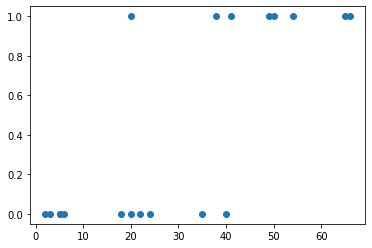

In [41]:
#Plot the data
plt.scatter(hair_length, gender_code)

In [45]:
#Create the numpy arrays like in Linear regression
arr_hair = np.array(hair_length).reshape(-1,1)
# arr_gender = np.array(gender_code).reshape(-1,1)
arr_gender = np.array(gender_code)

In [46]:
#Be careful, label are required in a line format not column
#use .ravel() function
print(arr_gender)
arr_gender = arr_gender.ravel()
print(arr_gender)

[1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]
[1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]


In [48]:
#Create a logistic regression and train it
model = skmod.LogisticRegression()
model = model.fit(arr_hair, arr_gender)

In [49]:
#print the score
print(model.score(arr_hair, arr_gender))

0.8421052631578947


In [60]:
#predict the result or the probability with predict_proba
print(model.predict(np.array([[35]])))
print(model.predict_proba(np.array([[35]])))

[1]
[[0.47592652 0.52407348]]


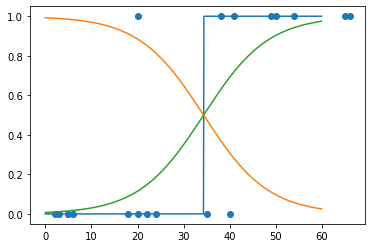

In [63]:
#plot our data, prediction and proba
plt.scatter(arr_hair, arr_gender)
plt.plot(np.arange(0,60,0.1), model.predict(np.arange(0,60,0.1).reshape(-1,1)))
plt.plot(np.arange(0,60,0.1), model.predict_proba(np.arange(0,60,0.1).reshape(-1,1)))

In [68]:
#the confusion matrix module sklearn.metrics, function confusion_matrix()
print(skmet.confusion_matrix(arr_gender, model.predict(arr_hair)))

[[9 2]
 [1 7]]


In [ ]:
#YOUR TURN (10 minutes)
#Make a logistic regression with the folowing data (data_student_work.txt in Teams):
# hours_homework = [1, 10, 3, 20, 32, 6, 1, 9, 2, 10, 5]
# sucess_exam = ['fail', 'pass','fail','pass','pass','fail','fail','pass','fail', 'fail', 'pass']
#precdit the probability of exam failing for a student who work 8 hours 
#per week don't use train and test and don't use any Scaler


## Label encoder

In [73]:
#The encoder object
encoder = skprepro.LabelEncoder()
a = ['success', 'fail', 'success']
print(encoder.fit_transform(a))
b = ['success']
print(encoder.transform(b))

[1 0 1]
[1]


## OVR (one versus rest) method (more than 2 classes)

In [81]:
#data from Data_activities
favorite_sport = ["Base Jump", "Tea with friends", "Base Jump", "Tea with friends", "Tea with friends", "Base Jump", "Base Jump", "Tea with friends", "Video games", "Base Jump", "Base Jump", "Video games", "Tea with friends", "Video games", "Tea with friends", "Video games", "Video games", "Video games"]

age = [32, 48, 28, 83, 87, 28, 25, 81, 20, 30, 25, 12, 80, 23, 87, 12, 24, 19]

In [82]:
#change our data to get code instead of text
encoder = skprepro.LabelEncoder()
fav_sport_code = encoder.fit_transform(favorite_sport)
print(fav_sport_code)

[0 1 0 1 1 0 0 1 2 0 0 2 1 2 1 2 2 2]


In [83]:
#change it to numpy array
fav_sport_code = np.array(fav_sport_code)
age = np.array(age).reshape(-1,1)

In [84]:
#make a logitic regression (use the parameter mutli_class = 'ovr')
model = skmod.LogisticRegression(multi_class = 'ovr').fit(age, fav_sport_code)

In [87]:
#make prediction and predict proba
print(model.predict(np.array([[50]])))
print(model.predict_proba(np.array([[50]])))

[1]
[[1.65343299e-02 9.83465670e-01 1.43984509e-15]]


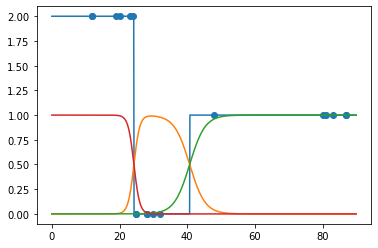

In [90]:
#plot it
plt.scatter(age, fav_sport_code)
plt.plot(np.arange(0,90,0.1), model.predict(np.arange(0,90,0.1).reshape(-1,1)))
plt.plot(np.arange(0,90,0.1), model.predict_proba(np.arange(0,90,0.1).reshape(-1,1)))

In [92]:
#print the confusion matrix
print(skmet.confusion_matrix(fav_sport_code, model.predict(age)))
print(model.score(age, fav_sport_code))

[[6 0 0]
 [0 6 0]
 [0 0 6]]
1.0


['Video games']


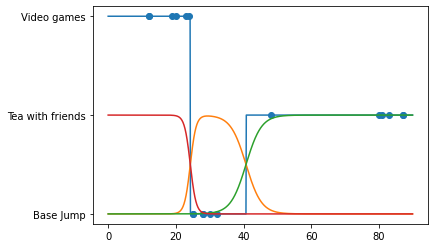

In [95]:
#also work with text instead of code
favorite_sport = ["Base Jump", "Tea with friends", "Base Jump", "Tea with friends", "Tea with friends", "Base Jump", "Base Jump", "Tea with friends", "Video games", "Base Jump", "Base Jump", "Video games", "Tea with friends", "Video games", "Tea with friends", "Video games", "Video games", "Video games"]
age = [32, 48, 28, 83, 87, 28, 25, 81, 20, 30, 25, 12, 80, 23, 87, 12, 24, 19]
age = np.array(age).reshape(-1,1)
model = skmod.LogisticRegression().fit(age, favorite_sport)
print(model.predict(np.array([[20]])))
plt.scatter(age, favorite_sport)
plt.plot(np.arange(0,90,0.1), model.predict(np.arange(0,90,0.1).reshape(-1,1)))
plt.plot(np.arange(0,90,0.1), model.predict_proba(np.arange(0,90,0.1).reshape(-1,1)))

In [105]:
#YOUR TURN (15 minutes)
#with the following data (salary in millions tenge) 
#(file data_salary_car.txt in Teams):
Salary = np.array([3.19, 4.28, 2.63, 4.6, 1.26, 1.17, 2.58, 4.19, 0.67, 1.88, 3.81, 1.57, 2.44, 0.97, 3.59, 1.7, 1.34, 1.91, 2.77, 2.53, 1.27])
Age= np.array([52, 66, 56, 50, 29, 20, 36, 33, 45, 53, 24, 59, 45, 69, 68, 26, 43, 45, 61, 20, 53])
Car = np.array(["Mercedes", "Mercedes", "Mercedes", "Toyota", "Kia", "Kia", "Toyota", "Toyota", "Peugot", "Toyota", "Peugot", "Toyota", "Toyota", "Peugot", "Mercedes", "Kia", "Toyota", "Toyota", "Mercedes", "Peugot", "Toyota"])

#Can you guess what if a probability of a 45 years old person with 
#a salary of 2.5 millions tenge to have a mercedes?
#don't use any scaler neither test and train sets
salary = Salary.reshape(-1,1)
age = Age.reshape(-1,1)

x = np.hstack([salary, age])
label_encoder = skprepro.LabelEncoder()
car_encode = label_encoder.fit_transform(Car)
model = skmod.LogisticRegression(multi_class = 'ovr').fit(x, car_encode )
print(model.predict_proba(np.array([[2.5, 45]])))
print(label_encoder.inverse_transform(model.predict_proba(np.array([[2.5, 45]]))))

[[0.01833553 0.10300613 0.25121112 0.62744722]]


ValueError: y should be a 1d array, got an array of shape (1, 4) instead.

# Code used to create a confusion matrix heat map

In [ ]:
# import seaborn as sns
# import pandas as pd

# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

# # Text(0.5,257.44,'Predicted label');